# Programming Assignment: 
## Готовим LDA по рецептам

Как вы уже знаете, в тематическом моделировании делается предположение о том, что для определения тематики порядок слов в документе не важен; об этом гласит гипотеза «мешка слов». Сегодня мы будем работать с несколько нестандартной для тематического моделирования коллекцией, которую можно назвать «мешком ингредиентов», потому что она состоит из рецептов блюд разных кухонь. Тематические модели ищут слова, которые часто вместе встречаются в документах, и составляют из них темы. Мы попробуем применить эту идею к рецептам и найти кулинарные «темы». Эта коллекция хороша тем, что не требует предобработки. Кроме того, эта задача достаточно наглядно иллюстрирует принцип работы тематических моделей.

Для выполнения заданий, помимо часто используемых в курсе библиотек, потребуются модули *json* и *gensim*. Первый входит в дистрибутив Anaconda, второй можно поставить командой 

*pip install gensim*

Построение модели занимает некоторое время. На ноутбуке с процессором Intel Core i7 и тактовой частотой 2400 МГц на построение одной модели уходит менее 10 минут.

### Загрузка данных

Коллекция дана в json-формате: для каждого рецепта известны его id, кухня (cuisine) и список ингредиентов, в него входящих. Загрузить данные можно с помощью модуля json (он входит в дистрибутив Anaconda):

In [1]:
import json # формат json

In [2]:
with open("recipes.json") as f:
    recipes = json.load(f)

In [3]:
print recipes[0]

{u'cuisine': u'greek', u'id': 10259, u'ingredients': [u'romaine lettuce', u'black olives', u'grape tomatoes', u'garlic', u'pepper', u'purple onion', u'seasoning', u'garbanzo beans', u'feta cheese crumbles']}


### Составление корпуса

In [5]:
from gensim import corpora, models
import numpy as np

Наша коллекция небольшая, и целиком помещается в оперативную память. Gensim может работать с такими данными и не требует их сохранения на диск в специальном формате. Для этого коллекция должна быть представлена в виде списка списков, каждый внутренний список соответствует отдельному документу и состоит из его слов. Пример коллекции из двух документов: 

[["hello", "world"], ["programming", "in", "python"]]

Преобразуем наши данные в такой формат, а затем создадим объекты corpus и dictionary, с которыми будет работать модель.

In [6]:
texts = [recipe["ingredients"] for recipe in recipes] # выбираем в texts только текст рецепта
dictionary = corpora.Dictionary(texts)   # составляем словарь из texts
corpus = [dictionary.doc2bow(text) for text in texts]  # составляем корпус документов

In [7]:
print texts[0]
print corpus[0]

[u'romaine lettuce', u'black olives', u'grape tomatoes', u'garlic', u'pepper', u'purple onion', u'seasoning', u'garbanzo beans', u'feta cheese crumbles']
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]


У объекта dictionary есть полезная переменная dictionary.token2id, позволяющая находить соответствие между ингредиентами и их индексами.

### Обучение модели
Вам может понадобиться [документация](https://radimrehurek.com/gensim/models/ldamodel.html) LDA в gensim.

__Задание 1.__ Обучите модель LDA с 40 темами, установив количество проходов по коллекции 5 и оставив остальные параметры по умолчанию. 


Затем вызовите метод модели *show_topics*, указав количество тем 40 и количество токенов 10, и сохраните результат (топы ингредиентов в темах) в отдельную переменную. Если при вызове метода *show_topics* указать параметр *formatted=True*, то топы ингредиентов будет удобно выводить на печать, если *formatted=False*, будет удобно работать со списком программно. Выведите топы на печать, рассмотрите темы, а затем ответьте на вопрос:

Сколько раз ингредиенты "salt", "sugar", "water", "mushrooms", "chicken", "eggs" встретились среди топов-10 всех 40 тем? При ответе __не нужно__ учитывать составные ингредиенты, например, "hot water".

Передайте 6 чисел в функцию save_answers1 и загрузите сгенерированный файл в форму.

У gensim нет возможности фиксировать случайное приближение через параметры метода, но библиотека использует numpy для инициализации матриц. Поэтому, по утверждению автора библиотеки, фиксировать случайное приближение нужно командой, которая написана в следующей ячейке. __Перед строкой кода с построением модели обязательно вставляйте указанную строку фиксации random.seed.__

In [8]:
np.random.seed(76543)
# Модель LDA
lda = models.ldamodel.LdaModel(corpus, num_topics=40, passes=5)

In [9]:
# создаем словарь нужных нам слов
dic = { "salt": dictionary.token2id["salt"], "sugar": dictionary.token2id["sugar"],
        "water": dictionary.token2id["water"], "mushrooms": dictionary.token2id["mushrooms"],
        "chicken": dictionary.token2id["chicken"], "eggs": dictionary.token2id["eggs"] }

# создаем словарь счетчика данных слов (в цикле будем набирать слова)
dic_2 = { "salt": 0, "sugar": 0, "water": 0, "mushrooms": 0,"chicken": 0, "eggs": 0 }

# создаем Топ 40 тем в которых будет по 10 топ слов
top_40_10 = lda.show_topics(num_topics=40, num_words=10, formatted=False)

for topics, words in top_40_10: # wцикл по Топ-40 темам
    for i in range(10): # цикл по Топ-10 словам в теме
        for k in dic.keys(): # цикл по ключам dic
            if dic[k] == int(words[i][0]):
                dic_2[k]+=1

print dic_2

{'mushrooms': 1, 'eggs': 1, 'sugar': 7, 'water': 8, 'chicken': 1, 'salt': 20}


In [10]:
def save_answers1(c_salt, c_sugar, c_water, c_mushrooms, c_chicken, c_eggs):
    with open("cooking_LDA_pa_task1.txt", "w") as fout:
        fout.write(" ".join([str(el) for el in [c_salt, c_sugar, c_water, c_mushrooms, c_chicken, c_eggs]]))

In [11]:
# сохраняем в файл задание 1
save_answers1(20, 7, 8, 1, 1, 1)

In [12]:
# сопоставим индексы терминов со словареми выведим термины в топовых темах
for t, w in top_40_10:
    print "тема:", t
    for i in range(10):
        print " слова:",  dictionary[ (int)(w[i][0]) ]
    print


тема: 0
 слова: cooking spray
 слова: salt
 слова: garlic cloves
 слова: olive oil
 слова: chopped onion
 слова: crushed red pepper
 слова: fat free less sodium chicken broth
 слова: black pepper
 слова: ground black pepper
 слова: water

тема: 1
 слова: carrots
 слова: onions
 слова: sauce
 слова: cabbage
 слова: spinach
 слова: beef
 слова: low sodium chicken broth
 слова: water
 слова: firm tofu
 слова: green cabbage

тема: 2
 слова: cracked black pepper
 слова: dry red wine
 слова: shortening
 слова: beef broth
 слова: vegetable oil cooking spray
 слова: grape tomatoes
 слова: cilantro sprigs
 слова: french bread
 слова: dried rosemary
 слова: all-purpose flour

тема: 3
 слова: potatoes
 слова: oil
 слова: salt
 слова: chickpeas
 слова: onions
 слова: coriander
 слова: pepper
 слова: saffron
 слова: chopped tomatoes
 слова: vegetables

тема: 4
 слова: green bell pepper
 слова: garlic powder
 слова: cayenne pepper
 слова: salt
 слова: paprika
 слова: onions
 слова: dried thyme
 слов

### Фильтрация словаря
В топах тем гораздо чаще встречаются первые три рассмотренных ингредиента, чем последние три. При этом наличие в рецепте курицы, яиц и грибов яснее дает понять, что мы будем готовить, чем наличие соли, сахара и воды. Таким образом, даже в рецептах есть слова, часто встречающиеся в текстах и не несущие смысловой нагрузки, и поэтому их не желательно видеть в темах. Наиболее простой прием борьбы с такими фоновыми элементами — фильтрация словаря по частоте. Обычно словарь фильтруют с двух сторон: убирают очень редкие слова (в целях экономии памяти) и очень частые слова (в целях повышения интерпретируемости тем). Мы уберем только частые слова.

In [13]:
# сдлаем копию нашего словаря
import copy
dictionary2 = copy.deepcopy(dictionary)

__Задание 2.__ У объекта dictionary2 есть переменная *dfs* — это словарь, ключами которого являются id токена, а элементами — число раз, сколько слово встретилось во всей коллекции. Сохраните в отдельный список ингредиенты, которые встретились в коллекции больше 4000 раз. Вызовите метод словаря *filter_tokens*, подав в качестве первого аргумента полученный список популярных ингредиентов. Вычислите две величины: dict_size_before и dict_size_after — размер словаря до и после фильтрации.

Затем, используя новый словарь, создайте новый корпус документов, corpus2, по аналогии с тем, как это сделано в начале ноутбука. Вычислите две величины: corpus_size_before и corpus_size_after — суммарное количество ингредиентов в корпусе (для каждого документа вычислите число различных ингредиентов в нем и просуммируйте по всем документам) до и после фильтрации.

Передайте величины dict_size_before, dict_size_after, corpus_size_before, corpus_size_after в функцию save_answers2 и загрузите сгенерированный файл в форму.

In [14]:
print dictionary2.dfs.keys()[100] # ключ слова
print dictionary2.dfs[100] # частота слова в коллекции документов

100
6236


In [15]:
dic2_2 = [] # создаем пустой список популярных слов

# добавляем в список только популярные слова с частотой более 4000
for i in range(len(dictionary2.dfs)):
    if dictionary2.dfs[i] > 4000:
        dic2_2.append(i)
print "id популярных ингридиентов:", dic2_2

# фильтрация словаря
dict_size_before = len(dictionary2) # длина словаря до фильтрации
dictionary2.filter_tokens(dic2_2) # фильтруем словарь выкидывая популярные(сахар,вода,...) слова из списка dic2_2 по токену (id) 
dict_size_after = len(dictionary2) # длина словаря после фильтрации
print "длина до фильтрации:", dict_size_before
print "длина после фильтрации:", dict_size_after

id популярных ингридиентов: [0, 4, 9, 12, 17, 21, 29, 45, 48, 54, 100, 117]
длина до фильтрации: 6714
длина после фильтрации: 6702


In [16]:
corpus2 = [dictionary2.doc2bow(text) for text in texts]  # составляем второй корпус документов по новому словарю

import collections

# через Counter создаем список из неповторяющихся терминов в каждом документе d и определяем длину данного списка
# она равна количеству неповторяющихся терминов в докумнте, затем список таких сумм (map) нам нужно проссумировать по элементам
corpus_size_before = sum(map(lambda d: len(collections.Counter(d)), corpus))
corpus_size_after = sum(map(lambda d: len(collections.Counter(d)), corpus2))

print "суммарное количество ингредиентов в корпусе до фильтра =", corpus_size_before
print "суммарное количество ингредиентов в корпусе после фильтра =", corpus_size_after

суммарное количество ингредиентов в корпусе до фильтра = 428249
суммарное количество ингредиентов в корпусе после фильтра = 343665


In [17]:
def save_answers2(dict_size_before, dict_size_after, corpus_size_before, corpus_size_after):
    with open("cooking_LDA_pa_task2.txt", "w") as fout:
        fout.write(" ".join([str(el) for el in [dict_size_before, dict_size_after, corpus_size_before, corpus_size_after]]))
        

# сохраняем в файл задание 2       
save_answers2(dict_size_before, dict_size_after, corpus_size_before, corpus_size_after)

### Сравнение когерентностей
__Задание 3.__ Постройте еще одну модель по корпусу corpus2 и словарю dictionary2, остальные параметры оставьте такими же, как при первом построении модели. Сохраните новую модель в другую переменную (не перезаписывайте предыдущую модель). Не забудьте про фиксирование seed!

Затем воспользуйтесь методом *top_topics* модели, чтобы вычислить ее когерентность. Передайте в качестве аргумента соответствующий модели корпус. Метод вернет список кортежей (топ токенов, когерентность), отсортированных по убыванию последней. Вычислите среднюю по всем темам когерентность для каждой из двух моделей и передайте в функцию save_answers3. 

In [18]:
np.random.seed(76543)
# Модель LDA 2
lda2 = models.ldamodel.LdaModel(corpus2, num_topics=40, passes=5)

In [19]:
np.random.seed(76543)

# вычисление Когерентности моделей lda1 и lda2 (отсортированные по когерентности: топ токенов, когерентность)
Coherence = lda.top_topics(corpus)
Coherence2 = lda2.top_topics(corpus2)

In [20]:
# перейдем к массиву numpy, чтобы обращаться к столцам массивов [:,1]
Coherence = np.array(Coherence)
Coherence2 = np.array(Coherence2)

# найдем средние Когерентности по первым столбцам массивов
Mean_Coherence = np.mean(Coherence[:,1])
Mean_Coherence2 = np.mean(Coherence2[:,1])

print Mean_Coherence, " ", Mean_Coherence2

-691.775594626   -763.054710141


In [21]:
def save_answers3(coherence, coherence2):
    with open("cooking_LDA_pa_task3.txt", "w") as fout:
        fout.write(" ".join(["%3f"%el for el in [coherence, coherence2]]))
        
# сохраняем в файл задание 3
save_answers3(Mean_Coherence, Mean_Coherence2)

Считается, что когерентность хорошо соотносится с человеческими оценками интерпретируемости тем. Поэтому на больших текстовых коллекциях когерентность обычно повышается, если убрать фоновую лексику. Однако в нашем случае этого не произошло. 

### Изучение влияния гиперпараметра alpha

В этом разделе мы будем работать со второй моделью, то есть той, которая построена по сокращенному корпусу. 

Пока что мы посмотрели только на матрицу темы-слова, теперь давайте посмотрим на матрицу темы-документы. Выведите темы для нулевого (или любого другого) документа из корпуса, воспользовавшись методом *get_document_topics* второй модели:

In [22]:
# вывести темы для нулевого документа из корпуса (corpus2) модели (lda2)
lda2.get_document_topics(corpus2[0])

[(19, 0.13646843904852057),
 (33, 0.6197815609514794),
 (37, 0.12812499999999999)]

Также выведите содержимое переменной *.alpha* второй модели:

In [23]:
# вывод гипермараметра alpha
lda2.alpha

array([ 0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025,
        0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025,
        0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025,
        0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025,
        0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025])

У вас должно получиться, что документ характеризуется небольшим числом тем. Попробуем поменять гиперпараметр alpha, задающий априорное распределение Дирихле для распределений тем в документах.

__Задание 4.__ Обучите третью модель: используйте сокращенный корпус (corpus2 и dictionary2) и установите параметр __alpha=1__, passes=5. Не забудьте про фиксацию seed! Выведите темы новой модели для нулевого документа; должно получиться, что распределение над множеством тем практически равномерное. Чтобы убедиться в том, что во второй модели документы описываются гораздо более разреженными распределениями, чем в третьей, посчитайте суммарное количество элементов, __превосходящих 0.01__, в матрицах темы-документы обеих моделей. Другими словами, запросите темы  модели для каждого документа с параметром *minimum_probability=0.01* и просуммируйте число элементов в получаемых массивах. Передайте две суммы (сначала для модели с alpha по умолчанию, затем для модели в alpha=1) в функцию save_answers4.

In [24]:
np.random.seed(76543)
# Модель LDA 3
lda3 = models.ldamodel.LdaModel(corpus2, num_topics=40, alpha=1, passes=5)

In [80]:
# Распределение тем в нулевом документе
lda3.get_document_topics(corpus2[0])

[(0, 0.021280822730040644),
 (1, 0.026587967891814692),
 (2, 0.021607526217663531),
 (3, 0.021276595773192741),
 (4, 0.021276595744680854),
 (5, 0.04532299669773119),
 (6, 0.021360216905604953),
 (7, 0.021426841621799534),
 (8, 0.021301512832182852),
 (9, 0.021276595744680854),
 (10, 0.021276595744680854),
 (11, 0.021277655802295466),
 (12, 0.021293717280997559),
 (13, 0.021276595749065933),
 (14, 0.021361611469720092),
 (15, 0.021276595744680854),
 (16, 0.021292161075523838),
 (17, 0.021287769651638238),
 (18, 0.021392613116651867),
 (19, 0.07665105729214354),
 (20, 0.04271942051036183),
 (21, 0.021430682277088053),
 (22, 0.031411587708908797),
 (23, 0.021276595744680868),
 (24, 0.021329231590978687),
 (25, 0.043150454206742662),
 (26, 0.021387835101242796),
 (27, 0.021276596591238185),
 (28, 0.021277116439632992),
 (29, 0.021410271527134268),
 (30, 0.021276644466145869),
 (31, 0.021276595744680854),
 (32, 0.021276595755339755),
 (33, 0.02633861317014936),
 (34, 0.021294946705676155),

In [92]:
# сумма по массиву количеств стем в каждом документе по модели 2
count_model2 = sum ( map(lambda x: len(lda2.get_document_topics(x, minimum_probability=0.01)) , corpus2 ) )

In [94]:
# сумма по массиву количеств стем в каждом документе по модели 3
count_model3 = sum ( map(lambda x: len(lda3.get_document_topics(x, minimum_probability=0.01)) , corpus2 ) )

In [95]:
print count_model2, count_model3

198995 1590960


In [96]:
def save_answers4(count_model2, count_model3):
    with open("cooking_LDA_pa_task4.txt", "w") as fout:
        fout.write(" ".join([str(el) for el in [count_model2, count_model3]]))

# сохраняем в файл задание 4
save_answers4(count_model2, count_model3)

Таким образом, гиперпараметр __alpha__ влияет на разреженность распределений тем в документах. Аналогично гиперпараметр __eta__ влияет на разреженность распределений слов в темах.

### LDA как способ понижения размерности
Иногда, распределения над темами, найденные с помощью LDA, добавляют в матрицу объекты-признаки как дополнительные, семантические, признаки, и это может улучшить качество решения задачи. Для простоты давайте просто обучим классификатор рецептов на кухни на признаках, полученных из LDA, и измерим точность (accuracy).

__Задание 5.__ Используйте модель, построенную по сокращенной выборке с alpha по умолчанию (вторую модель). Составьте матрицу $\Theta = p(t|d)$ вероятностей тем в документах; вы можете использовать тот же метод get_document_topics, а также вектор правильных ответов y (в том же порядке, в котором рецепты идут в переменной recipes). Создайте объект RandomForestClassifier со 100 деревьями, с помощью функции cross_val_score вычислите среднюю accuracy по трем фолдам (перемешивать данные не нужно) и передайте в функцию save_answers5.

In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score

In [150]:
# матрица частот тем в коллекции документов
matrica = np.zeros((len(texts), 40))  # создаем пустую матрицу документы / темы

for i in range(len(corpus2[:])): # цикл по коллекции документов
    k = lda2.get_document_topics(corpus2[i]) # получаем темы в каждом документе (номер темы, частота)
    for j in range(len(k)): # цикл по темам в каждом документе
        n = k[j][0] # номер темы
        m = k[j][1] # частота темы
        matrica[i,n] = m

In [169]:
# создаем целевые метки по названию кухонь мира
y = map(lambda x:  x['cuisine'], recipes)

# модель Случайный лес
FOREST = RandomForestClassifier(n_estimators = 100, random_state=0)

# Кросс Валидация
cv = cross_val_score(estimator=FOREST, X=matrica, y=y)

# Оценка точности
accuracy_mean_score = np.mean(cv)

In [170]:
accuracy_mean_score

0.54789558924835025

In [171]:
def save_answers5(accuracy):
     with open("cooking_LDA_pa_task5.txt", "w") as fout:
        fout.write(str(accuracy))
        
# сохраняем в файл задание 5
save_answers5(accuracy_mean_score)

Для такого большого количества классов это неплохая точность. Вы можете попроовать обучать RandomForest на исходной матрице частот слов, имеющей значительно большую размерность, и увидеть, что accuracy увеличивается на 10–15%. Таким образом, LDA собрал не всю, но достаточно большую часть информации из выборки, в матрице низкого ранга.

### LDA — вероятностная модель
Матричное разложение, использующееся в LDA, интерпретируется как следующий процесс генерации документов.

Для документа $d$ длины $n_d$:
1. Из априорного распределения Дирихле с параметром alpha сгенерировать распределение над множеством тем: $\theta_d \sim Dirichlet(\alpha)$
1. Для каждого слова $w = 1, \dots, n_d$:
    1. Сгенерировать тему из дискретного распределения $t \sim \theta_{d}$
    1. Сгенерировать слово из дискретного распределения $w \sim \phi_{t}$.
    
Подробнее об этом в [Википедии](https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation).

В контексте нашей задачи получается, что, используя данный генеративный процесс, можно создавать новые рецепты. Вы можете передать в функцию модель и число ингредиентов и сгенерировать рецепт :)

In [172]:
def generate_recipe(model, num_ingredients):
    theta = np.random.dirichlet(model.alpha)
    for i in range(num_ingredients):
        t = np.random.choice(np.arange(model.num_topics), p=theta)
        topic = model.show_topic(t, topn=model.num_terms)
        topic_distr = [x[1] for x in topic]
        terms = [x[0] for x in topic]
        w = np.random.choice(terms, p=topic_distr)
        print w

In [209]:
generate_recipe(lda2, 5)

3117
371
1972
3759
4759


### Интерпретация построенной модели
Вы можете рассмотреть топы ингредиентов каждой темы. Большиснтво тем сами по себе похожи на рецепты; в некоторых собираются продукты одного вида, например, свежие фрукты или разные виды сыра.

Попробуем эмпирически соотнести наши темы с национальными кухнями (cuisine). Построим матрицу $A$ размера темы $x$ кухни, ее элементы $a_{tc}$ — суммы $p(t|d)$ по всем документам $d$, которые отнесены к кухне $c$. Нормируем матрицу на частоты рецептов по разным кухням, чтобы избежать дисбаланса между кухнями. Следующая функция получает на вход объект модели, объект корпуса и исходные данные и возвращает нормированную матрицу $A$. Ее удобно визуализировать с помощью seaborn.

In [217]:
import pandas
import seaborn
from matplotlib import pyplot as plt
%matplotlib inline

In [218]:
def compute_topic_cuisine_matrix(model, corpus, recipes):
    # составляем вектор целевых признаков
    targets = list(set([recipe["cuisine"] for recipe in recipes]))
    # составляем матрицу
    tc_matrix = pandas.DataFrame(data=np.zeros((model.num_topics, len(targets))), columns=targets)
    for recipe, bow in zip(recipes, corpus):
        recipe_topic = model.get_document_topics(bow)
        for t, prob in recipe_topic:
            tc_matrix[recipe["cuisine"]][t] += prob
    # нормируем матрицу
    target_sums = pandas.DataFrame(data=np.zeros((1, len(targets))), columns=targets)
    for recipe in recipes:
        target_sums[recipe["cuisine"]] += 1
    return pandas.DataFrame(tc_matrix.values/target_sums.values, columns=tc_matrix.columns)

In [219]:
def plot_matrix(tc_matrix):
    plt.figure(figsize=(10, 10))
    seaborn.heatmap(tc_matrix, square=True)

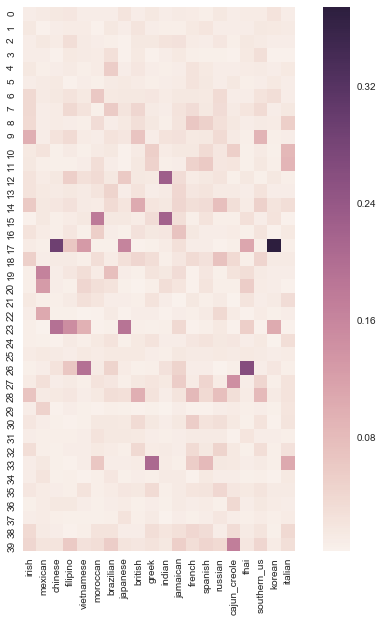

In [222]:
# Визуализируйте матрицу
plot_matrix(compute_topic_cuisine_matrix(lda2, corpus2, recipes) )

Чем темнее квадрат в матрице, тем больше связь этой темы с данной кухней. Мы видим, что у нас есть темы, которые связаны с несколькими кухнями. Такие темы показывают набор ингредиентов, которые популярны в кухнях нескольких народов, то есть указывают на схожесть кухонь этих народов. Некоторые темы распределены по всем кухням равномерно, они показывают наборы продуктов, которые часто используются в кулинарии всех стран. 

Жаль, что в датасете нет названий рецептов, иначе темы было бы проще интерпретировать...

### Заключение
В этом задании вы построили несколько моделей LDA, посмотрели, на что влияют гиперпараметры модели и как можно использовать построенную модель. 